### `TOPIC: Understanding Pooling and Padding in CNN`

### 1. Describe the purpose and benefits of pooling in CNN.

Pooling, specifically in Convolutional Neural Networks (CNNs), serves the purpose of reducing the spatial dimensions of the input volume. This reduction is achieved by down-sampling, which helps in controlling the computational complexity of the model and capturing the most important information.

For a feature map having dimensions nh x nw x nc, the dimensions of output obtained after a pooling layer is :

`(nh - f + 1) / s x (nw - f + 1)/s x nc`

where, 

`
 nh - height of feature map
 nw - width of feature map
 nc - number of channels in the feature map
 f  - size of filter
 s  - stride length
`

The two common types of pooling used in CNNs are Max Pooling and Average Pooling.

1. ### `Max Pooling:`

* `Purpose:`
  Max pooling extracts the maximum value from a group of neighboring pixels in a feature map. It retains the most prominent       feature in a local region, helping to preserve important patterns and reduce sensitivity to small variations.

* `Benefits:`
  1. Translation Invariance: Max pooling is less sensitive to small translations or distortions in the input, making the network      more robust.
  2. Reduction of Spatial Dimensions: By selecting the maximum value, max pooling reduces the size of the feature maps,              decreasing computational requirements and preventing overfitting.
  3. Highlighting Dominant Features: Max pooling emphasizes the most significant features within a local region, aiding in 
     capturing essential information.
     
     
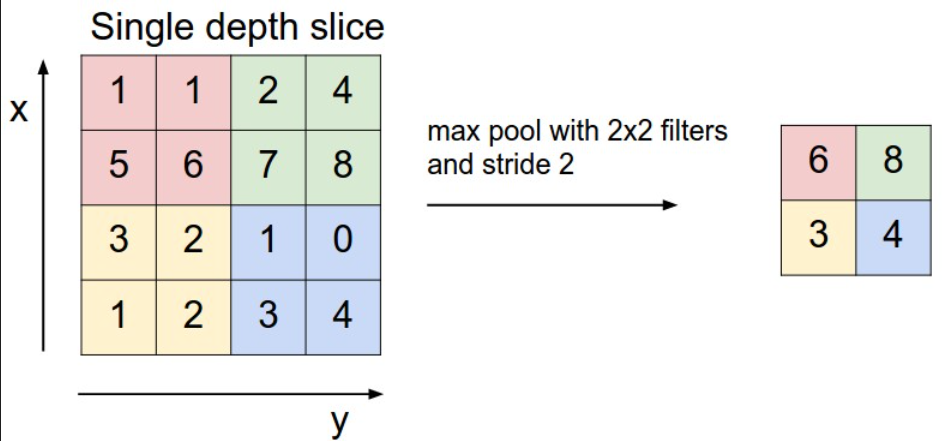



In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import MaxPooling2D
 
# define input image
image = np.array([[2, 2, 7, 3],
                  [9, 4, 6, 1],
                  [8, 5, 2, 4],
                  [3, 1, 2, 6]])
image = image.reshape(1, 4, 4, 1)
 
# define model containing just a single max pooling layer
model = Sequential(
    [MaxPooling2D(pool_size = 2, strides = 2)])
 
# generate pooled output
output = model.predict(image)
 
# print output image
output = np.squeeze(output)
print(output)

In [ ]:
"""[[9. 7.]
[8. 6.]]"""

2. ### `Average Pooling:`

* `Purpose:` 
  Average pooling computes the average value of a group of neighboring pixels. It provides a smoother down-sampling compared to 
  max pooling, considering the average intensity in the local region.
  
* `Benefits:`
   1. Smoothing: Average pooling can reduce the sensitivity to noise or small fluctuations in the input data, providing a more 
      generalized representation.
   2. Computational Efficiency: Like max pooling, average pooling helps in reducing the spatial dimensions of the input, 
      contributing to computational efficiency.
      
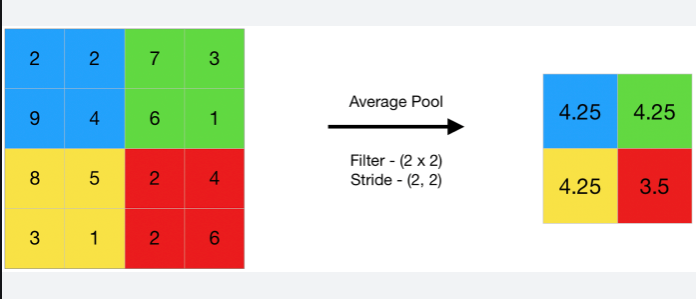

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import AveragePooling2D

# define input image
image = np.array([[2, 2, 7, 3],
                  [9, 4, 6, 1],
                  [8, 5, 2, 4],
                  [3, 1, 2, 6]])
image = image.reshape(1, 4, 4, 1)

# define model containing just a single average pooling layer
model = Sequential(
    [AveragePooling2D(pool_size = 2, strides = 2)])

# generate pooled output
output = model.predict(image)

# print output image
output = np.squeeze(output)
print(output)


In [ ]:
"""[[4.25 4.25]
[4.25 3.5 ]]"""

#### `Overall Benefits of Pooling in CNNs:`

1. `Dimensionality Reduction:` Pooling helps in reducing the spatial dimensions of the feature maps, which is crucial in     
    managing computational resources and preventing overfitting.
2. `Translation Invariance:` Pooling, especially max pooling, enhances the network's ability to recognize features regardless of 
    their exact location in the input space, making the model more robust.
3. `Computational Efficiency:` By downsampling the feature maps, pooling reduces the number of parameters and computations 
    required in subsequent layers, speeding up the training and inference processes.
4. `Feature Retention:` While reducing dimensionality, pooling retains the most important features by emphasizing dominant 
    patterns in local regions.
    
    
In summary, pooling in CNNs contributes to the efficiency, robustness, and generalization capabilities of the network by down-sampling the spatial dimensions of feature maps while preserving essential information.

### 2. Explain the difference between min pooling and max pooling.

Min pooling and max pooling are two different types of pooling operations used in Convolutional Neural Networks (CNNs) for down-sampling feature maps. The key difference lies in how they select values from the local regions of the input.

### `Max Pooling:`

* `Operation:` Max pooling extracts the maximum value from a group of neighboring pixels in a specified region (often a 2x2 or      3x3 window).
* `Selection:` The maximum value in the local region is retained, and the other values are discarded.
* `Purpose:` Max pooling is particularly effective in capturing the most prominent feature within a local region. It enhances 
   the network's ability to recognize patterns regardless of their exact spatial location, providing translation invariance.
* `Example:` For a 2x2 max pooling operation, if the values in a local region are [3, 7, 2, 5], the maximum value (7) would be 
   selected.
   
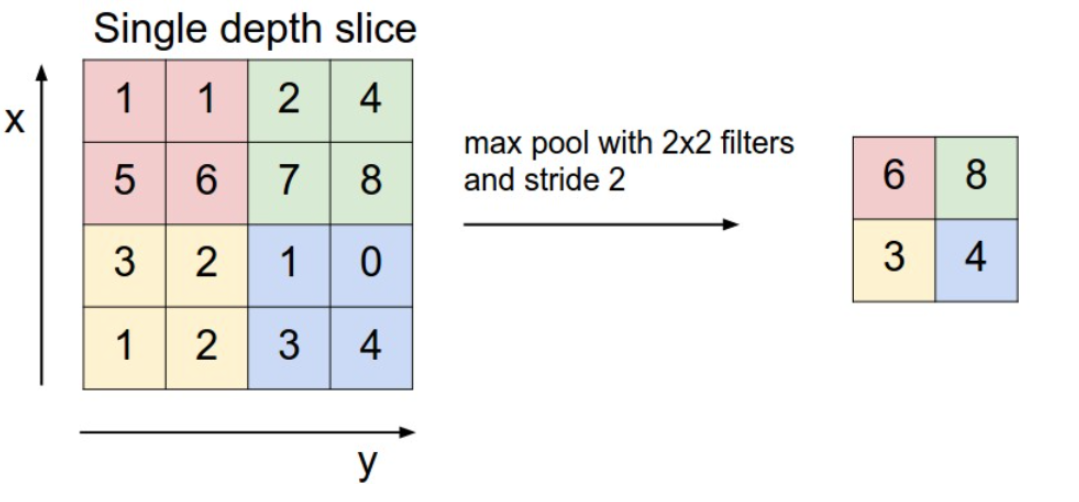

### `Min Pooling:`

* `Operation:` Min pooling involves extracting the minimum value from a group of neighboring pixels in a specified region.
* `Selection:` The minimum value in the local region is retained, and the other values are discarded.
* `Purpose:` Min pooling, like max pooling, contributes to translation invariance but emphasizes the smallest value within a 
   local region. It may be useful in certain scenarios where the smallest feature is crucial.
* `Example:` For a 2x2 min pooling operation, if the values in a local region are [3, 7, 2, 5], the minimum value (2) would be 
   selected.

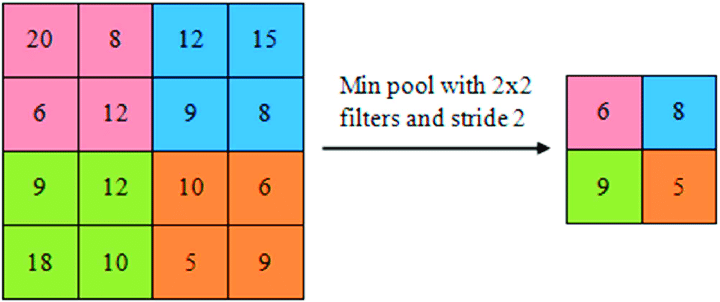

#### `Comparison:`

* Feature Emphasis: Max pooling focuses on the most significant feature in a local region, while min pooling emphasizes the 
  smallest feature.
* Translation Invariance: Both max pooling and min pooling contribute to translation invariance, making the network less   
  sensitive to the precise location of features.
* Use Cases: Max pooling is more commonly used in practice, as it tends to capture dominant features effectively. Min pooling 
  might be used in specific cases where the smallest values are of particular importance.
  
In summary, the primary difference between min pooling and max pooling lies in the selection criterion—max pooling selects the maximum value, while min pooling selects the minimum value from a local region in the input.

### 3. Discuss the concept of padding in CNN and its significance.

Padding is a technique used in Convolutional Neural Networks (CNNs) to preserve spatial information through the convolutional layers. The convolution operation, especially when using small filter sizes, can cause the spatial dimensions of the feature maps to shrink as they pass through the network. Padding helps to address this issue by adding extra pixels around the input data before convolution, thereby maintaining the spatial dimensions of the feature maps.

Here's a more detailed explanation of padding in CNNs and its significance:

#### `Padding in Convolutional Layers:`

* `Definition of Padding:`
  * Padding involves adding extra pixels (usually with zero values) around the input data before applying the convolution    
     operation.
  * Padding is typically applied symmetrically on all sides of the input.
  
* `No Padding (Valid Convolution):`
  *  In the absence of padding (often referred to as "valid" convolution), the filter is applied only to the valid part of the 
     input. As a result, the spatial dimensions of the feature maps are reduced.
     
* `With Padding (Same Convolution):`
  * Padding ensures that the filter is applied to the entire input, including the borders. This is often called "same" 
    convolution, as the output feature map has the same spatial dimensions as the input.
    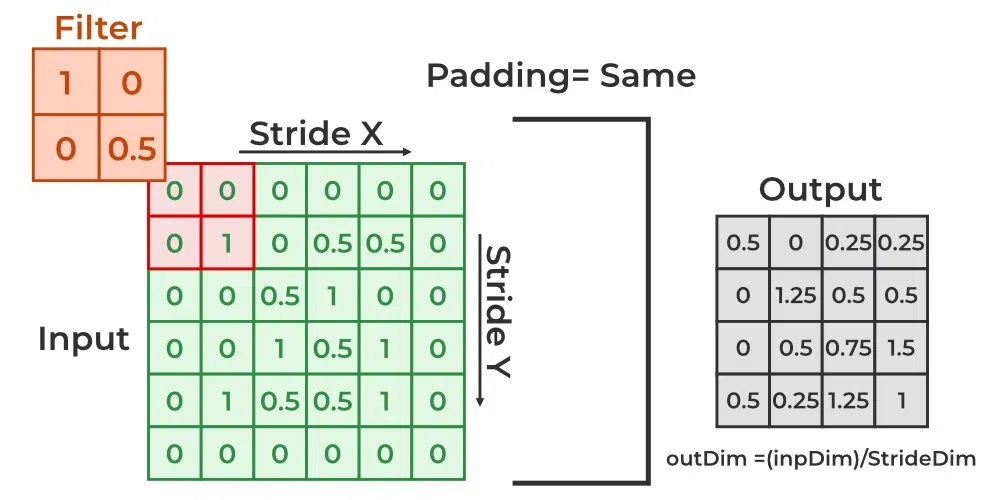


#### `Significance of Padding:`

1. `Preservation of Spatial Information:`
   Padding helps to retain the spatial information of the input. Without padding, the convolution operation may gradually reduce 
   the size of the feature maps, leading to a loss of spatial resolution.
2. `Prevention of Border Information Loss:`
   Convolutional layers may ignore information at the borders of the input, especially when using small filters. Padding ensures 
   that information near the borders is considered during the convolution, improving the network's ability to capture features 
   at the edges of objects.
3. `Centering the Convolutional Filter:`
   Padding allows the convolutional filter to be centered on the pixels of the input. This is important for capturing features 
   accurately, especially when the filter size is larger.
4. `Facilitation of Stride and Pooling:`
   Padding can facilitate the use of larger strides in convolution or pooling layers. It provides more flexibility in 
   controlling the down-sampling rate and helps in designing architectures with specific spatial resolutions.
5. `Improved Learning Representations:`
   Networks with padding often learn more robust representations, as they can consider information from the entire input, 
   leading to better generalization.
   
   

### `Padding Concept:`
![](https://miro.medium.com/max/395/1*1okwhewf5KCtIPaFib4XaA.gif)

In summary, padding in CNNs is a crucial technique for maintaining spatial information, preventing border information loss, and improving the overall performance and representational capacity of the network. It plays a significant role in ensuring that the convolutional layers effectively capture features from the input data.

### 4. Compare and contrast zero-padding and valid-padding in terms of their effects on the output feature map size.

Zero-padding and valid-padding are two different approaches to handling the spatial dimensions of the input and determining the size of the output feature map in Convolutional Neural Networks (CNNs).

#### `Zero-padding(Same padding):`

This is a popular technique which ensures size parity between the output feature maps and the input image. It achieves this by padding the input borders in a way that allows the convolutional filter to stride evenly across the image.

Same Padding allows every pixel in the input to be at the center of the filter at least once. Its application preserves spatial information, and avoids border effects. Here, padding size depends directly on the size of the filter.

Same Padding is particularly valuable when spatial preservation is crucial. Tasks requiring precise object localization, or those which need to maintain the resolution of feature maps benefit from it. By maintaining spatial dimensions throughout the network, Same Padding ensures that positional details and fine-grained information are accurately captured.

* `Definition:`In zero-padding, extra pixels with zero values are added around the input image before applying the convolution 
   operation.
   
* `Effect on Output Size:`Zero-padding maintains the spatial dimensions of the input. The convolution operation is applied to 
   the entire input, including the newly added zero-padded pixels.
   
* `Use Case:`Zero-padding is commonly used when it is desirable to maintain the spatial resolution of the feature maps, 
   especially in early layers of the network.

#### `Valid-padding (No Padding):`

Valid padding is the absence of any extra pixels added to the borders of the input feature map. Thus, Valid Padding is essentially the same as no padding.

In this strategy, the convolution is performed only on the pixels which completely overlap with the filter. As a result, its output feature maps are smaller than the input. It gives rise to a more pronounced downsampling effect.

Valid Padding is often used when reducing spatial dimensions and extracting high-level features are desirable. Object classification tasks, or those requiring reduction of computational complexity benefit from this technique. While Valid Padding leads to a loss of spatial information, it can be advantageous when capturing global context and reducing the computational burden.

* `Definition:`In valid-padding (also known as no padding), the convolution operation is applied to the valid part of the input 
   without adding any extra pixels.
   
* `Effect on Output Size:`Valid-padding does not add any extra pixels, which results in a reduction in the spatial dimensions of 
   the output feature map.
   
* `Use Case:`Valid-padding is often used when a reduction in spatial dimensions is acceptable or desired. It is common in later 
   layers of the network where down-sampling is typically applied.

### `TOPIC: Exploring LeNet`

### 1. Provide a brief overview of LeNet-5 architecture.

### Basic Introduction

LeNet-5, from the paper Gradient-Based Learning Applied to Document Recognition, is a very efficient convolutional neural network for handwritten character recognition.


<a href="http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf" target="_blank">Paper: <u>Gradient-Based Learning Applied to Document Recognition</u></a>

**Authors**: Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner

**Published in**: Proceedings of the IEEE (1998)

### Structure of the LeNet network

LeNet5 is a small network, it contains the basic modules of deep learning: convolutional layer, pooling layer, and full link layer. It is the basis of other deep learning models. Here we analyze LeNet5 in depth. At the same time, through example analysis, deepen the understanding of the convolutional layer and pooling layer.

![lenet](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/lenet-5.png)


LeNet-5 Total seven layer , does not comprise an input, each containing a trainable parameters; each layer has a plurality of the Map the Feature , a characteristic of each of the input FeatureMap extracted by means of a convolution filter, and then each FeatureMap There are multiple neurons.

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/arch.jpg)

Detailed explanation of each layer parameter:

#### **INPUT Layer**

The first is the data INPUT layer. The size of the input image is uniformly normalized to 32 * 32.

> Note: This layer does not count as the network structure of LeNet-5. Traditionally, the input layer is not considered as one of the network hierarchy.


#### **C1 layer-convolutional layer**

>**Input picture**: 32 * 32

>**Convolution kernel size**: 5 * 5

>**Convolution kernel types**: 6

>**Output featuremap size**: 28 * 28 (32-5 + 1) = 28

>**Number of neurons**: 28 * 28 * 6

>**Trainable parameters**: (5 * 5 + 1) * 6 (5 * 5 = 25 unit parameters and one bias parameter per filter, a total of 6 filters)

>**Number of connections**: (5 * 5 + 1) * 6 * 28 * 28 = 122304

**Detailed description:**

1. The first convolution operation is performed on the input image (using 6 convolution kernels of size 5 * 5) to obtain 6 C1 feature maps (6 feature maps of size 28 * 28, 32-5 + 1 = 28).

2. Let's take a look at how many parameters are needed. The size of the convolution kernel is 5 * 5, and there are 6 * (5 * 5 + 1) = 156 parameters in total, where +1 indicates that a kernel has a bias.

3. For the convolutional layer C1, each pixel in C1 is connected to 5 * 5 pixels and 1 bias in the input image, so there are 156 * 28 * 28 = 122304 connections in total. There are 122,304 connections, but we only need to learn 156 parameters, mainly through weight sharing.


#### **S2 layer-pooling layer (downsampling layer)**

>**Input**: 28 * 28

>**Sampling area**: 2 * 2

>**Sampling method**: 4 inputs are added, multiplied by a trainable parameter, plus a trainable offset. Results via sigmoid

>**Sampling type**: 6

>**Output featureMap size**: 14 * 14 (28/2)

>**Number of neurons**: 14 * 14 * 6

>**Trainable parameters**: 2 * 6 (the weight of the sum + the offset)

>**Number of connections**: (2 * 2 + 1) * 6 * 14 * 14

>The size of each feature map in S2 is 1/4 of the size of the feature map in C1.

**Detailed description:**

The pooling operation is followed immediately after the first convolution. Pooling is performed using 2 * 2 kernels, and S2, 6 feature maps of 14 * 14 (28/2 = 14) are obtained.

The pooling layer of S2 is the sum of the pixels in the 2 * 2 area in C1 multiplied by a weight coefficient plus an offset, and then the result is mapped again.

So each pooling core has two training parameters, so there are 2x6 = 12 training parameters, but there are 5x14x14x6 = 5880 connections.

#### **C3 layer-convolutional layer**

>**Input**: all 6 or several feature map combinations in S2

>**Convolution kernel size**: 5 * 5

>**Convolution kernel type**: 16

>**Output featureMap size**: 10 * 10 (14-5 + 1) = 10

>Each feature map in C3 is connected to all 6 or several feature maps in S2, indicating that the feature map of this layer is a different combination of the feature maps extracted from the previous layer.

>One way is that the first 6 feature maps of C3 take 3 adjacent feature map subsets in S2 as input. The next 6 feature maps take 4 subsets of neighboring feature maps in S2 as input. The next three take the non-adjacent 4 feature map subsets as input. The last one takes all the feature maps in S2 as input.

>**The trainable parameters are**: 6 * (3 * 5 * 5 + 1) + 6 * (4 * 5 * 5 + 1) + 3 * (4 * 5 * 5 + 1) + 1 * (6 * 5 * 5 +1) = 1516

>**Number of connections**: 10 * 10 * 1516 = 151600

**Detailed description:**

After the first pooling, the second convolution, the output of the second convolution is C3, 16 10x10 feature maps, and the size of the convolution kernel is 5 * 5. We know that S2 has 6 14 * 14 feature maps, how to get 16 feature maps from 6 feature maps? Here are the 16 feature maps calculated by the special combination of the feature maps of S2. details as follows:




The first 6 feature maps of C3 (corresponding to the 6th column of the first red box in the figure above) are connected to the 3 feature maps connected to the S2 layer (the first red box in the above figure), and the next 6 feature maps are connected to the S2 layer The 4 feature maps are connected (the second red box in the figure above), the next 3 feature maps are connected with the 4 feature maps that are not connected at the S2 layer, and the last is connected with all the feature maps at the S2 layer. The convolution kernel size is still 5 * 5, so there are 6 * (3 * 5 * 5 + 1) + 6 * (4 * 5 * 5 + 1) + 3 * (4 * 5 * 5 + 1) +1 * (6 * 5 * 5 + 1) = 1516 parameters. The image size is 10 * 10, so there are 151600 connections.

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/c31.png)


The convolution structure of C3 and the first 3 graphs in S2 is shown below:

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/c32.png)


#### **S4 layer-pooling layer (downsampling layer)**

>**Input**: 10 * 10

>**Sampling area**: 2 * 2

>**Sampling method**: 4 inputs are added, multiplied by a trainable parameter, plus a trainable offset. Results via sigmoid

>**Sampling type**: 16

>**Output featureMap size**: 5 * 5 (10/2)

>**Number of neurons**: 5 * 5 * 16 = 400

>**Trainable parameters**: 2 * 16 = 32 (the weight of the sum + the offset)

>**Number of connections**: 16 * (2 * 2 + 1) * 5 * 5 = 2000

>The size of each feature map in S4 is 1/4 of the size of the feature map in C3

**Detailed description:**

S4 is the pooling layer, the window size is still 2 * 2, a total of 16 feature maps, and the 16 10x10 maps of the C3 layer are pooled in units of 2x2 to obtain 16 5x5 feature maps. This layer has a total of 32 training parameters of 2x16, 5x5x5x16 = 2000 connections.

*The connection is similar to the S2 layer.*

#### **C5 layer-convolution layer**

>**Input**: All 16 unit feature maps of the S4 layer (all connected to s4)

>**Convolution kernel size**: 5 * 5

>**Convolution kernel type**: 120

>**Output featureMap size**: 1 * 1 (5-5 + 1)

>**Trainable parameters / connection**: 120 * (16 * 5 * 5 + 1) = 48120

**Detailed description:**


The C5 layer is a convolutional layer. Since the size of the 16 images of the S4 layer is 5x5, which is the same as the size of the convolution kernel, the size of the image formed after convolution is 1x1. This results in 120 convolution results. Each is connected to the 16 maps on the previous level. So there are (5x5x16 + 1) x120 = 48120 parameters, and there are also 48120 connections. The network structure of the C5 layer is as follows:

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/c5.png)


#### **F6 layer-fully connected layer**

>**Input**: c5 120-dimensional vector

>**Calculation method**: calculate the dot product between the input vector and the weight vector, plus an offset, and the result is output through the sigmoid function.

>**Trainable parameters**: 84 * (120 + 1) = 10164

**Detailed description:**

Layer 6 is a fully connected layer. The F6 layer has 84 nodes, corresponding to a 7x12 bitmap, -1 means white, 1 means black, so the black and white of the bitmap of each symbol corresponds to a code. The training parameters and number of connections for this layer are (120 + 1) x84 = 10164. The ASCII encoding diagram is as follows:

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/f61.png)

The connection method of the F6 layer is as follows:

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/f62.png)


#### **Output layer-fully connected layer**

The output layer is also a fully connected layer, with a total of 10 nodes, which respectively represent the numbers 0 to 9, and if the value of node i is 0, the result of network recognition is the number i. A radial basis function (RBF) network connection is used. Assuming x is the input of the previous layer and y is the output of the RBF, the calculation of the RBF output is:

![lenet1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/lenet/81.png)

The value of the above formula w_ij is determined by the bitmap encoding of i, where i ranges from 0 to 9, and j ranges from 0 to 7 * 12-1. The closer the value of the RBF output is to 0, the closer it is to i, that is, the closer to the ASCII encoding figure of i, it means that the recognition result input by the current network is the character i. This layer has 84x10 = 840 parameters and connections.

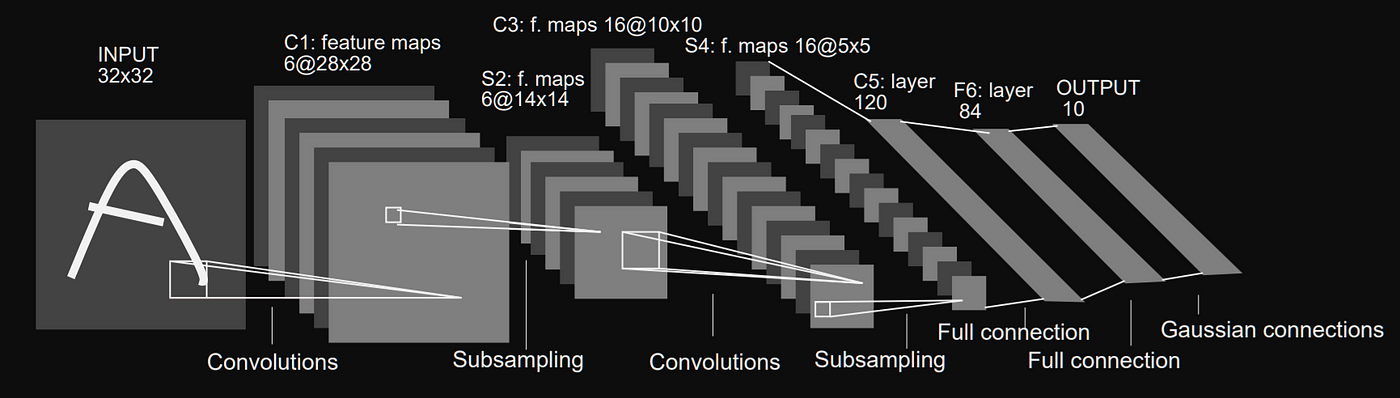


**Summary**


* LeNet-5 is a very efficient convolutional neural network for handwritten character recognition.
* Convolutional neural networks can make good use of the structural information of images.
* The convolutional layer has fewer parameters, which is also determined by the main characteristics of the convolutional layer, that is, local connection and shared weights.












### 2. Describe the key components of LeNet-5 and their respective purpose.

LeNet-5 is a pioneering Convolutional Neural Network (CNN) architecture developed by Yann LeCun and his collaborators in the 1990s. It played a significant role in the advancement of deep learning and convolutional neural networks, particularly in the field of image recognition. LeNet-5 was designed for handwritten digit recognition and was later extended to recognize more complex patterns in larger datasets. Here are the key components of LeNet-5 and their respective purposes:

* #### `Input Layer:`
  * Purpose: The input layer takes the raw pixel values of the input image. In the original LeNet-5, the network was designed 
    for grayscale images, and the typical input size was 32x32 pixels.

* #### `Convolutional Layers:`
  * Purpose: LeNet-5 consists of two convolutional layers followed by subsampling (pooling) layers. The convolutional layers use 
    small filters to convolve over the input image, capturing local features and patterns. The purpose is to learn hierarchical 
    representations of features.

* #### `Activation Function (Sigmoid or Tanh):`
  * Purpose: Traditionally, the sigmoid activation function was used in LeNet-5, but tanh was also considered. The activation 
    function introduces non-linearity to the model, allowing it to learn complex relationships between input features.

* #### `Subsampling (Pooling) Layers:`
  * Purpose: After each convolutional layer, LeNet-5 employs subsampling layers (often using average pooling). These layers 
    reduce the spatial dimensions of the feature maps, making the network more computationally efficient and providing a degree     of translation invariance.

* #### `Fully Connected Layers:`
  * Purpose: The subsampled feature maps are flattened and connected to fully connected layers. These layers act as classifiers, 
    combining the learned features to make predictions. The fully connected layers in LeNet-5 are often followed by activation 
    functions.

* #### `Output Layer:`
  * Purpose: The output layer is a fully connected layer with as many neurons as there are classes in the classification task. 
    The activation function used in the output layer depends on the task—softmax is commonly used for multi-class    
    classification.

* #### `Softmax Activation:`
  * Purpose: In multi-class classification tasks, the softmax activation function is often applied to the output layer. It 
    converts the raw output scores into probabilities, providing a probability distribution over the classes.

* #### `Loss Function:`
  * Purpose: The choice of the loss function depends on the specific task. Cross-entropy loss is commonly used for 
    classification tasks. The goal during training is to minimize this loss, adjusting the network's weights to improve   
    predictive accuracy.

* #### `Training Techniques:`
  * Purpose: LeNet-5 was trained using gradient-based optimization algorithms such as stochastic gradient descent (SGD). It 
    utilized backpropagation to update the weights of the network during training.

* #### `Other Components:`
  * LeNet-5 may also include techniques such as local response normalization (LRN) to improve generalization.


It's important to note that LeNet-5 laid the groundwork for more modern CNN architectures, and while it may seem relatively simple by today's standards, it played a crucial role in demonstrating the effectiveness of deep learning for image recognition tasks. Subsequent architectures, such as AlexNet, VGGNet, and modern architectures like ResNet and Inception, have built upon and extended the principles introduced by LeNet-5.

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


# Building the Model Architecture

model = Sequential()

model.add(Conv2D(6, kernel_size = (5,5), padding = 'valid', activation='tanh', input_shape = (32,32,3)))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(16, kernel_size = (5,5), padding = 'valid', activation='tanh'))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.summary()


model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=2, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

### 3. Discuss the advantages and limitations of LeNet-5 in the context of image classification tasks.

LeNet-5, as one of the pioneering Convolutional Neural Network (CNN) architectures, had several advantages that contributed to its success in the context of image classification tasks. However, it also had some limitations that became apparent as the field of deep learning advanced. Here's a discussion of the advantages and limitations of LeNet-5:

### `Advantages:`

1. `Hierarchical Feature Learning:`LeNet-5 introduced the concept of hierarchical feature learning through convolutional and   
   subsampling layers. This enabled the network to learn increasingly complex features from the input image, leading to improved 
   representation.
   
2. `Localized Receptive Fields:`The use of small convolutional filters allowed LeNet-5 to capture local features effectively.   
   The localized receptive fields helped the model focus on specific patterns in the input.

3. `Translation Invariance:`The combination of convolutional and pooling layers provided a level of translation invariance, 
   meaning that the model could recognize features regardless of their precise location in the input image.

4. `Efficient Architecture:`LeNet-5 was designed to be computationally efficient, making it feasible to train on the available 
   hardware at the time. It laid the foundation for more complex architectures that followed.

5. `Success in Handwritten Digit Recognition:`LeNet-5 demonstrated significant success in handwritten digit recognition tasks, 
   particularly on datasets like MNIST. Its architecture was well-suited for recognizing simple patterns and shapes.

### `Limitations:`

1. `Limited Capacity for Complex Patterns:` LeNet-5 has a relatively shallow architecture compared to modern CNNs. As a result, 
    it may struggle with learning complex hierarchical features present in more challenging image recognition tasks.
    
2. `Activation Functions:` LeNet-5 primarily used sigmoid or tanh activation functions, which can suffer from the vanishing 
    gradient problem. Modern networks often use Rectified Linear Units (ReLU) to mitigate this issue.

3. `Small Receptive Fields:`The small receptive fields used in LeNet-5 may limit its ability to capture large and global 
    features in the input image. Larger receptive fields have become common in modern architectures.

4. `Limited Flexibility:`LeNet-5 was designed for specific tasks like handwritten digit recognition, and its architecture may 
    not generalize well to diverse and complex datasets encountered in more modern image classification challenges.
    
5. `Lack of Skip Connections:`LeNet-5 did not include skip connections or residual connections, which have proven effective in 
    mitigating vanishing gradient problems and facilitating the training of very deep networks.
    
6. `Not Suitable for High-Resolution Images:`LeNet-5 was designed for relatively small input sizes (e.g., 32x32 pixels). It may 
    not be well-suited for high-resolution images commonly encountered in modern datasets.
    
    

In summary, while LeNet-5 was a groundbreaking architecture that significantly influenced the development of CNNs, it has limitations that make it less suitable for the demands of contemporary image classification tasks. Modern architectures have addressed these limitations by incorporating deeper structures, non-linear activation functions, skip connections, and adapting to more complex datasets with higher resolution images.

### 4. Implement LeNet-5 using a deep learning framework of your choice (eg. TensorFlow,PyTorch) and train it on a publicly available dataset(eg. MNIST). Evaluate its performance and provide insigts.

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

# Importing Dataset(MNIST)
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


# Building the Model Architecture

model = Sequential()

model.add(Conv2D(6, kernel_size = (5,5), padding = 'valid', activation='tanh', input_shape = (32,32,3)))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(16, kernel_size = (5,5), padding = 'valid', activation='tanh'))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.summary()


model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=2, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

### `TOPIC: Analyzing AlexNet`

### 1. Present an overview of the AlexNet architecture.

>AlexNet was designed by Hinton, winner of the 2012 ImageNet competition, and his student Alex Krizhevsky. It was also after that year that more and deeper neural networks were proposed, such as the excellent vgg, GoogleLeNet. Its official data model has an accuracy rate of 57.1% and top 1-5 reaches 80.2%. This is already quite outstanding for traditional machine learning classification algorithms.


![title](https://raw.githubusercontent.com/entbappy/Branching-tutorial/19087e9920ff7db29e4103cc660bb41eca510b57/alexnet/alexnet.png)


![title](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/alexnet/alexnet2.png)

>The following table below explains the network structure of AlexNet:



<table>
<thead>
	<tr>
		<th>Size / Operation</th>
		<th>Filter</th>
		<th>Depth</th>
		<th>Stride</th>
		<th>Padding</th>
		<th>Number of Parameters</th>
		<th>Forward Computation</th>
	</tr>
</thead>
<tbody>
	<tr>
		<td>3* 227 * 227</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Conv1 + Relu</td>
		<td>11 * 11</td>
		<td>96</td>
		<td>4</td>
		<td></td>
		<td>(11*11*3 + 1) * 96=34944</td>
		<td>(11*11*3 + 1) * 96 * 55 * 55=105705600</td>
	</tr>
	<tr>
		<td>96 * 55 * 55</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Max Pooling</td>
		<td>3 * 3</td>
		<td></td>
		<td>2</td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>96 * 27 * 27</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Norm</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Conv2 + Relu</td>
		<td>5 * 5</td>
		<td>256</td>
		<td>1</td>
		<td>2</td>
		<td>(5 * 5 * 96 + 1) * 256=614656</td>
		<td>(5 * 5 * 96 + 1) * 256 * 27 * 27=448084224</td>
	</tr>
	<tr>
		<td>256 * 27 * 27</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Max Pooling</td>
		<td>3 * 3</td>
		<td></td>
		<td>2</td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>256 * 13 * 13</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Norm</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Conv3 + Relu</td>
		<td>3 * 3</td>
		<td>384</td>
		<td>1</td>
		<td>1</td>
		<td>(3 * 3 * 256 + 1) * 384=885120</td>
		<td>(3 * 3 * 256 + 1) * 384 * 13 * 13=149585280</td>
	</tr>
	<tr>
		<td>384 * 13 * 13</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Conv4 + Relu</td>
		<td>3 * 3</td>
		<td>384</td>
		<td>1</td>
		<td>1</td>
		<td>(3 * 3 * 384 + 1) * 384=1327488</td>
		<td>(3 * 3 * 384 + 1) * 384 * 13 * 13=224345472</td>
	</tr>
	<tr>
		<td>384 * 13 * 13</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Conv5 + Relu</td>
		<td>3 * 3</td>
		<td>256</td>
		<td>1</td>
		<td>1</td>
		<td>(3 * 3 * 384 + 1) * 256=884992</td>
		<td>(3 * 3 * 384 + 1) * 256 * 13 * 13=149563648</td>
	</tr>
	<tr>
		<td>256 * 13 * 13</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Max Pooling</td>
		<td>3 * 3</td>
		<td></td>
		<td>2</td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>256 * 6 * 6</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Dropout (rate 0.5)</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>FC6 + Relu</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td>256 * 6 * 6 * 4096=37748736</td>
		<td>256 * 6 * 6 * 4096=37748736</td>
	</tr>
	<tr>
		<td>4096</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Dropout (rate 0.5)</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>FC7 + Relu</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td>4096 * 4096=16777216</td>
		<td>4096 * 4096=16777216</td>
	</tr>
	<tr>
		<td>4096</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>FC8 + Relu</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td>4096 * 1000=4096000</td>
		<td>4096 * 1000=4096000</td>
	</tr>
	<tr>
		<td>1000 classes</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Overall</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td>62369152=62.3 million</td>
		<td>1135906176=1.1 billion</td>
	</tr>
	<tr>
		<td>Conv VS FC</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td>Conv:3.7million (6%) , FC: 58.6 million  (94% )</td>
		<td>Conv: 1.08 billion (95%) , FC: 58.6 million (5%)</td>
	</tr>
</tbody>
</table>

### 2. Explain the architectural innovations introduced in AlexNet that contributed to its breakthrough performance.

### Why does AlexNet achieve better results in comparison to LeNet-5:

1. **Relu activation function is used.**

Relu function: f (x) = max (0, x)

![alex1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/alexnet/alex512.png)

ReLU-based deep convolutional networks are trained several times faster than tanh and sigmoid- based networks. The following figure shows the number of iterations for a four-layer convolutional network based on CIFAR-10 that reached 25% training error in tanh and ReLU:

![alex1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/alexnet/alex612.png)

2. **Standardization ( Local Response Normalization )**

After using ReLU f (x) = max (0, x), you will find that the value after the activation function has no range like the tanh and sigmoid functions, so a normalization will usually be done after ReLU, and the LRU is a steady proposal (Not sure here, it should be proposed?) One method in neuroscience is called "Lateral inhibition", which talks about the effect of active neurons on its surrounding neurons.

![alex1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/alexnet/alex3.jpg)


3. **Dropout**

Dropout is also a concept often said, which can effectively prevent overfitting of neural networks. Compared to the general linear model, a regular method is used to prevent the model from overfitting. In the neural network, Dropout is implemented by modifying the structure of the neural network itself. For a certain layer of neurons, randomly delete some neurons with a defined probability, while keeping the individuals of the input layer and output layer neurons unchanged, and then update the parameters according to the learning method of the neural network. In the next iteration, rerandom Remove some neurons until the end of training.


![alex1](https://raw.githubusercontent.com/entbappy/Branching-tutorial/master/alexnet/alex4.jpg)


4. **Enhanced Data ( Data Augmentation )**



**In deep learning, when the amount of data is not large enough, there are generally 4 solutions:**

>  Data augmentation- artificially increase the size of the training set-create a batch of "new" data from existing data by means of translation, flipping, noise

>  Regularization——The relatively small amount of data will cause the model to overfit, making the training error small and the test error particularly large. By adding a regular term after the Loss Function , the overfitting can be suppressed. The disadvantage is that a need is introduced Manually adjusted hyper-parameter.

>  Dropout- also a regularization method. But different from the above, it is achieved by randomly setting the output of some neurons to zero

>  Unsupervised Pre-training- use Auto-Encoder or RBM's convolution form to do unsupervised pre-training layer by layer, and finally add a classification layer to do supervised Fine-Tuning

### 3. Discuss the role of convolutional layers, pooling layers, and fully connected layers in AlexNet.

In the AlexNet architecture, convolutional layers, pooling layers, and fully connected layers play distinct but complementary roles in the process of hierarchical feature extraction and classification. Here's an overview of the roles of each layer type in AlexNet:

### `Convolutional Layers:`

* `Role:` Convolutional layers are responsible for learning hierarchical features in the input image. They use convolutional filters to capture local patterns and structures.

* `Specifics in AlexNet:`
  * AlexNet consists of five convolutional layers. The first two layers use large filters (11x11 and 5x5) to capture low-level   
    features, while the subsequent layers use smaller 3x3 filters for more detailed feature extraction.
  * ReLU activation functions are applied after each convolution operation, introducing non-linearity to the model.

* `Learning Features:`The convolutional layers learn low-level features in the early layers (e.g., edges, textures) and    
   progressively higher-level features in deeper layers.


### `Pooling Layers:`

* `Role:` Pooling layers, specifically max pooling in the case of AlexNet, are used to down-sample the spatial dimensions of the 
   feature maps, providing a level of translation invariance and reducing computational complexity.

* `Specifics in AlexNet:`
  * Max pooling layers follow the convolutional layers, reducing the spatial dimensions by selecting the maximum value in local 
    regions.
  * Pooling layers help maintain important features while discarding less relevant information.
  
* `Translation Invariance:`Pooling contributes to translation invariance by selecting the most significant features in a local   
   region, making the network less sensitive to small translations.
   
   
### `Fully Connected Layers:`

* `Role:` Fully connected layers serve as classifiers, combining the high-level features learned by the convolutional layers for 
   making predictions. They map the extracted features to the output classes.
   
* `Specifics in AlexNet:`
  * Three fully connected layers follow the convolutional and pooling layers in AlexNet. 
  * ReLU activation functions are used in the fully connected layers, introducing non-linearity.

* `Feature Combination:`Fully connected layers aggregate and combine the features learned by the convolutional layers, capturing 
   complex relationships among features.
   
* `Output Layer:`The final fully connected layer is often followed by a softmax activation function in the output layer. This 
   produces a probability distribution over the classes, facilitating multi-class classification.
   
   
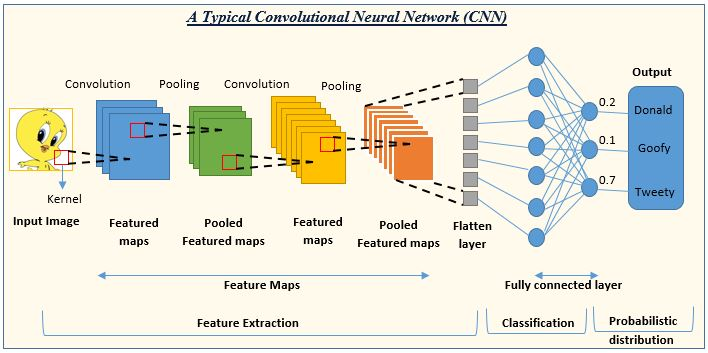

In summary, convolutional layers in AlexNet extract hierarchical features from the input, pooling layers down-sample spatial dimensions, and fully connected layers act as classifiers, combining features for final predictions. The combination of these layers enables AlexNet to effectively learn and classify features in large-scale image datasets.

### 4. Implement AlexNet using a deep learning framework of your choice and evaluate its performance an a dataset of your choice.

In [4]:
!pip install tflearn

In [5]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# Get Data
import tflearn.datasets.oxflower17 as oxflower17
from keras.utils import to_categorical

x, y = oxflower17.load_data()

x_train = x.astype('float32') / 255.0
y_train = to_categorical(y, num_classes=17)

In [ ]:
print(x_train.shape)
print(y_train.shape)

In [ ]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())



# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())


# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))


# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())


# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train
model.fit(x_train, y_train, batch_size=64, epochs=5, verbose=1,validation_split=0.2, shuffle=True)